In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-50V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 3, strides=1, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# Residual Blocks
def residual_block_v2(x, filters, kernel_size=3, strides=1, activation='relu'):
    y = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation(activation)(y)

    y = layers.Conv2D(filters, kernel_size, padding='same')(y)
    y = layers.BatchNormalization()(y)

    shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
    shortcut = layers.BatchNormalization()(shortcut)

    out = layers.add([shortcut, y])
    out = layers.Activation(activation)(out)
    return out

# Stack of residual blocks
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=256, strides=2)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training for 10 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,  # Train for 10 epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size
)

# Evaluation
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Additional Evaluation (Accuracy)
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)



Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.



Epoch 1/10


375/375 [==============================] - 291s 723ms/step - loss: 2.4845 - accuracy: 0.3004 - val_loss: 6.7397 - val_accuracy: 0.0267
Epoch 2/10
375/375 [==============================] - 338s 901ms/step - loss: 1.0234 - accuracy: 0.6858 - val_loss: 0.7779 - val_accuracy: 0.7613
Epoch 3/10
375/375 [==============================] - 125s 334ms/step - loss: 0.5576 - accuracy: 0.8248 - val_loss: 0.9360 - val_accuracy: 0.7070
Epoch 4/10
375/375 [==============================] - 114s 303ms/step - loss: 0.3853 - accuracy: 0.8783 - val_loss: 1.4676 - val_accuracy: 0.6053
Epoch 5/10
375/375 [==============================] - 114s 305ms/step - loss: 0.2790 - accuracy: 0.9139 - val_loss: 0.7269 - val_accuracy: 0.7757
Epoch 6/10
375/375 [==============================] - 114s 304ms/step - loss: 0.2296 - accuracy: 0.9276 - val_loss: 2.6303 - val_accuracy: 0.4790
Epoch 7/10
375/375 [===========


Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.



Epoch 1/30


375/375 [==============================] - 115s 298ms/step - loss: 2.4059 - accuracy: 0.3158 - val_loss: 5.2096 - val_accuracy: 0.0497
Epoch 2/30
375/375 [==============================] - 111s 297ms/step - loss: 0.9756 - accuracy: 0.7020 - val_loss: 0.7901 - val_accuracy: 0.7413
Epoch 3/30
375/375 [==============================] - 111s 297ms/step - loss: 0.5188 - accuracy: 0.8407 - val_loss: 0.7859 - val_accuracy: 0.7433
Epoch 4/30
375/375 [==============================] - 124s 330ms/step - loss: 0.3691 - accuracy: 0.8873 - val_loss: 0.9797 - val_accuracy: 0.7043
Epoch 5/30
375/375 [==============================] - 123s 327ms/step - loss: 0.2771 - accuracy: 0.9105 - val_loss: 1.0409 - val_accuracy: 0.7113
Epoch 6/30
375/375 [==============================] - 111s 297ms/step - loss: 0.2195 - accuracy: 0.9312 - val_loss: 0.3570 - val_accuracy: 0.8897
Epoch 7/30
375/375 [===========

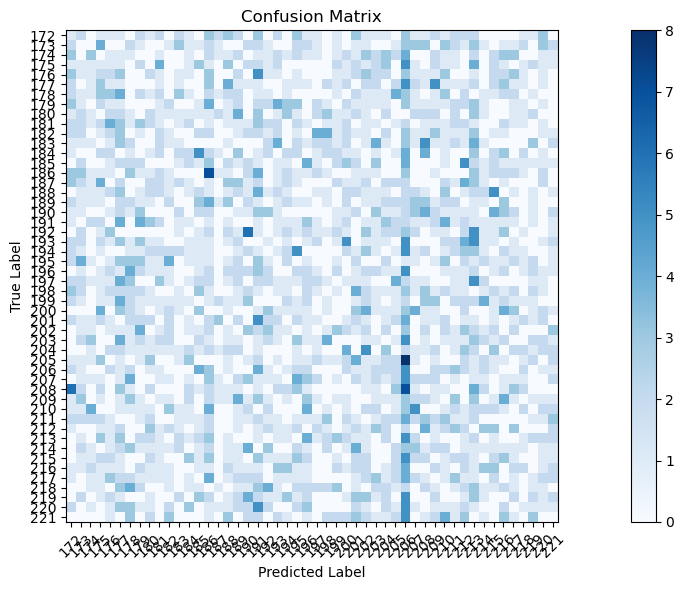

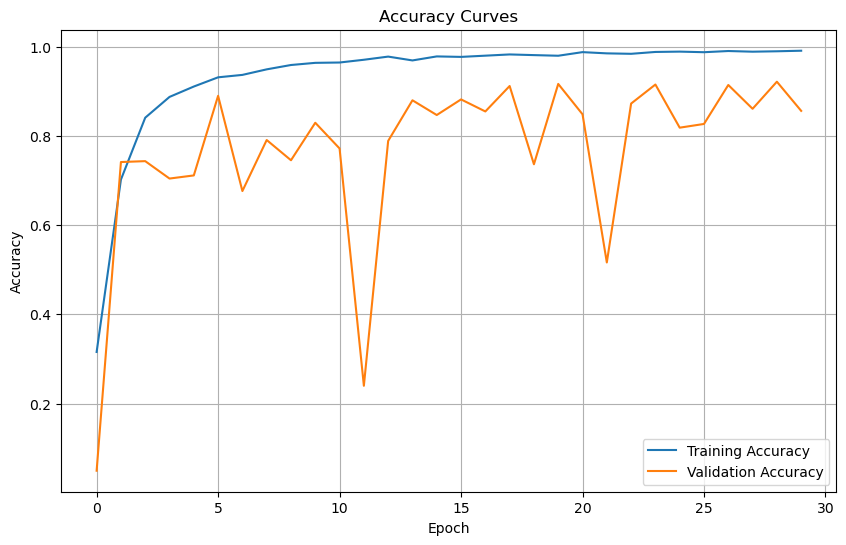

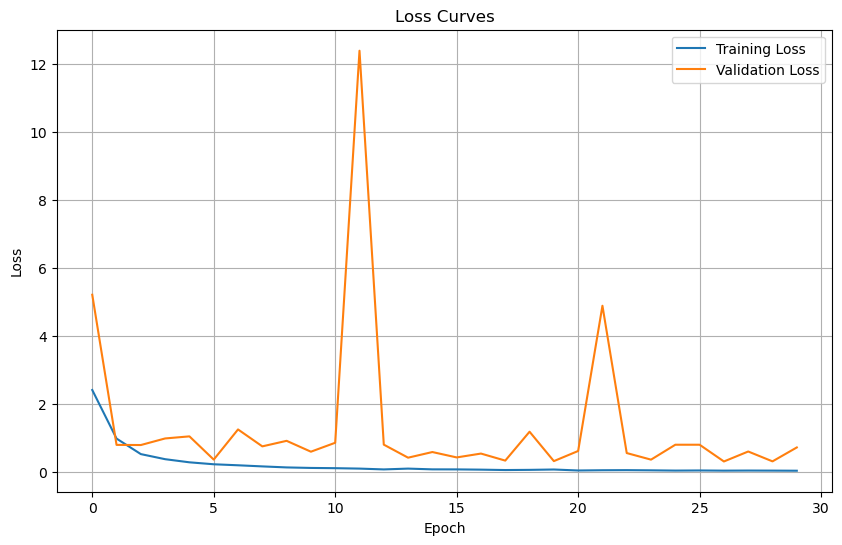

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-50V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 3, strides=1, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# Residual Blocks
def residual_block_v2(x, filters, kernel_size=3, strides=1, activation='relu'):
    y = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation(activation)(y)

    y = layers.Conv2D(filters, kernel_size, padding='same')(y)
    y = layers.BatchNormalization()(y)

    shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
    shortcut = layers.BatchNormalization()(shortcut)

    out = layers.add([shortcut, y])
    out = layers.Activation(activation)(out)
    return out

# Stack of residual blocks
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=256, strides=2)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training for 30 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=30,  # Train for 10 epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size
)

# Evaluation
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels, zero_division=1)
print(report)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(15, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
